In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from citipy import citipy
from census import Census
from config import  gkey
import gmaps
import time
from us import states
import json

In [2]:
combined_data = pd.read_csv("Census_Zillow_Combined_CA.csv")
combined_data.head()

,Zipcode,City,State,CountyName,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,average rent,Median Home Value,Number of House Build in year,Avg_HomeValue,Employment Rate
0,90001,Florence-Graham,CA,Los Angeles,57942.0,28.0,34323.0,11294.0,18902.0,32.622277,915.0,272200.0,1950.0,2.999500e+05,44.482413
1,90002,Los Angeles,CA,Los Angeles,51826.0,27.5,32520.0,11212.0,18302.0,35.314321,902.0,248200.0,1951.0,2.946667e+05,40.938911
2,90003,Los Angeles,CA,Los Angeles,70208.0,28.0,31878.0,10611.0,24556.0,34.976071,958.0,268500.0,1951.0,3.002417e+05,42.456700
3,90004,Los Angeles,CA,Los Angeles,63095.0,35.5,43180.0,29194.0,12919.0,20.475473,1044.0,838000.0,1946.0,1.168492e+06,57.777954
4,90005,Los Angeles,CA,Los Angeles,39338.0,33.9,31485.0,20265.0,11520.0,29.284661,943.0,672600.0,1947.0,7.051917e+05,58.897249


In [34]:
api_key = "288538c4c4aa958caf000f4ac70ef2f0"
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={api_key}&q="

combined_data["Latitude"] = ""
combined_data["Longitude"] = ""
combined_data["Temp"] = ""

for index, row in combined_data.iterrows():
    city = row["City"]+",us"
    response = requests.get(url + city).json()
    
    try:
        combined_data.loc[index, "Latitude"] = response["coord"]["lat"]
        combined_data.loc[index, "Longitude"] = response["coord"]["lon"]
        combined_data.loc[index, "Temp"] = response["main"]["temp"]
        
    except:
        pass
    
combined_data.head()
#csv
combined_data.to_csv("Combined_loc_CA.csv",index = False)

In [48]:
# limited the lat and lng within California  "min_lat": 32.5121,"max_lat": 42.0126,"min_lng": -124.6509,"max_lng": -114.1315
combined_data = combined_data[combined_data["Latitude"] != ""]
combined_data = combined_data[combined_data["Latitude"] >= 32.5121]
combined_data = combined_data[combined_data["Longitude"] <= -114.1315]
combined_data = combined_data[combined_data["Longitude"] >= -124.6509]
combined_data.count()

Zipcode                          1067
City                             1067
State                            1067
CountyName                       1067
Population                       1067
Median Age                       1067
Household Income                 1067
Per Capita Income                1067
Poverty Count                    1067
Poverty Rate                     1067
average rent                     1067
Median Home Value                1067
Number of House Build in year    1067
Avg_HomeValue                    1067
Employment Rate                  1067
Latitude                         1067
Longitude                        1067
Temp                             1067
dtype: int64

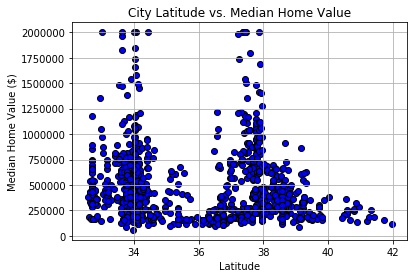

In [49]:
plt.scatter(combined_data["Latitude"], combined_data["Median Home Value"], marker="o", facecolor="blue", edgecolor="black")
plt.title("City Latitude vs. Median Home Value")
plt.ylabel("Median Home Value ($)")
plt.xlabel("Latitude")
plt.grid(True)

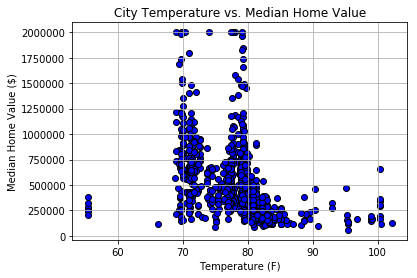

In [50]:
plt.scatter(combined_data["Temp"], combined_data["Median Home Value"], marker="o", facecolor="blue", edgecolor="black")
plt.title("City Temperature vs. Median Home Value")
plt.ylabel("Median Home Value ($)")
plt.xlabel("Temperature (F)")
plt.grid(True)

# Heatmap by Median Home Value

In [51]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)

In [63]:
# Store 'Lat' and 'Lng' into  locations 
locations = combined_data[["Latitude", "Longitude"]].astype(float)

# Convert Home Value/ Population to float and store
# HINT: be sure to handle NaN values
home_value = combined_data["Median Home Value"].astype(float)
population = combined_data["Population"].astype(float)
#max home value and poplulation
print(population.max())
print(home_value.max())

106360.0
2000001.0


In [64]:
# Create a home value Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=home_value, 
                                 dissipating=False, max_intensity=2000001,
                                 point_radius = 0.08)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 2000001
heat_layer.point_radius = 0.08

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [66]:
# Create a home value Heatmap layer
fig = gmaps.figure()

heat_layer_1 = gmaps.heatmap_layer(locations, weights=population, 
                                 dissipating=False, max_intensity=106360,
                                 point_radius = 0.08)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer_1.dissipating = False
heat_layer_1.max_intensity = 106360
heat_layer_1.point_radius = 0.08

fig.add_layer(heat_layer_1)

fig

Figure(layout=FigureLayout(height='420px'))

# Search Whole Foods Market Locations

In [78]:
#create list for whole foods locations
lat=[]
lng=[]
counter =0
# geocoordinates
for target_coordinate in locations:
    target_search = "Whole Foods Market"
    target_radius = 8000
    target_type = "grocery"

# set up a parameters dictionary
    params = {
        "location": target_coordinates,
        "keyword": target_search,
        "radius": target_radius,
        "type": target_type,
        "key": gkey
    }

# base url
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

# run a request using our params dictionary
    response = requests.get(base_url, params=params)
# convert response to json
    places_data = response.json()
    counter+=1
    try:
        print(json.dumps(places_data, indent=4, sort_keys=True))
    except:
        pass

{
    "html_attributions": [],
    "results": [],
    "status": "INVALID_REQUEST"
}
{
    "html_attributions": [],
    "results": [],
    "status": "INVALID_REQUEST"
}
